## DSP Homework 4:
### Noise Reduction Using Moving Average Filter
Introduction:

The moving average filter is one of the simplest and most widely used techniques for noise reduction in signal processing.
By averaging neighboring samples, this filter effectively suppresses high-frequency noise, at the cost of potentially smoothing out important signal details.

In biomedical signals such as EEG, moving average filters are often used as a preprocessing step to reduce artifacts and high-frequency fluctuations before further analysis.

Objectives:

 1. Implement a moving average filter

 2. Analyze the effect of window size on noise reduction

 3. Compute standard deviation of filtered signals

 4. Compute Signal-to-Noise Ratio (SNR)

 5. Understand the trade-off between noise suppression and signal distortion

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Signal Definition

In [2]:
A = np.array([0.1, 0.2, 0.5, 0.9, 1.3, 1.0, 0.4, 0.2, -0.1, 0.1])

### The moving average filter computes the average of samples within a sliding window:

- Window length is odd

- Anchor point is at the center

- Zero-padding is used at the signal boundaries

In [3]:
def moving_average(signal, window_size):
    pad_size = window_size // 2
    padded_signal = np.pad(signal, pad_size, mode='constant', constant_values=0)
    
    filtered_signal = np.zeros_like(signal)
    for i in range(len(signal)):
        filtered_signal[i] = np.mean(
            padded_signal[i : i + window_size]
        )
    return filtered_signal

### Apply Moving Average Filter (Window Size = 3)

In [4]:
filtered_w3 = moving_average(A, window_size=3)
filtered_w3

array([0.1       , 0.26666667, 0.53333333, 0.9       , 1.06666667,
       0.9       , 0.53333333, 0.16666667, 0.06666667, 0.        ])

### Apply Moving Average Filter (Window Size = 5)

In [5]:
filtered_w5 = moving_average(A, window_size=5)
filtered_w5

array([0.16, 0.34, 0.6 , 0.78, 0.82, 0.76, 0.56, 0.32, 0.12, 0.04])

### Standard Deviation of Filtered Signals

The standard deviation reflects the amount of variation in the signal and is commonly used as an indicator of noise level.

In [6]:
std_original = np.std(A)
std_w3 = np.std(filtered_w3)
std_w5 = np.std(filtered_w5)

std_original, std_w3, std_w5

(np.float64(0.4363484845854286),
 np.float64(0.37214095298540967),
 np.float64(0.27687542325024084))

### Signal-to-Noise Ratio (SNR)

In [7]:
def compute_snr(signal, filtered_signal):
    noise = filtered_signal - signal
    return 10 * np.log10(np.sum(signal**2) / np.sum(noise**2))

### SNR Calculation

In [8]:
snr_w3 = compute_snr(A, filtered_w3)
snr_w5 = compute_snr(A, filtered_w5)

snr_w3, snr_w5

(np.float64(15.015637111873223), np.float64(9.731883565477299))

### Results Summary Table

In [9]:
results = pd.DataFrame({
    "Signal": ["Original", "Filtered (W=3)", "Filtered (W=5)"],
    "Standard Deviation": [std_original, std_w3, std_w5],
    "SNR (dB)": [np.nan, snr_w3, snr_w5]
})

results.round(1)

,Signal,Standard Deviation,SNR (dB)
0,Original,0.4,NaN
1,Filtered (W=3),0.4,15.0
2,Filtered (W=5),0.3,9.7


### Visualization

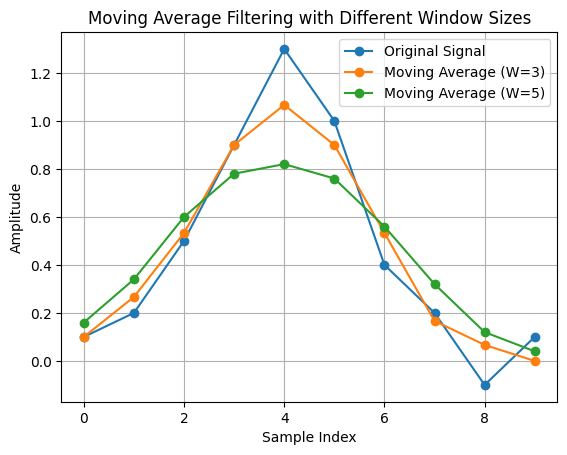

In [10]:
plt.figure()
plt.plot(A, label="Original Signal", marker='o')
plt.plot(filtered_w3, label="Moving Average (W=3)", marker='o')
plt.plot(filtered_w5, label="Moving Average (W=5)", marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Moving Average Filtering with Different Window Sizes")
plt.legend()
plt.grid(True)
plt.show()

### Final Interpretation:

 - Increasing the window size leads to stronger noise reduction.

 - A larger window produces a smoother signal but may suppress important signal details.

 - Standard deviation decreases as window size increases.

 - SNR improves with larger windows, indicating better noise suppression.

 - There is a clear trade-off between noise reduction and signal fidelity.

 - In biomedical signal processing, choosing the window size depends on the application and the frequency content of interest.